In [138]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

In [139]:
# Save path to data set in a variable
data_file = "COBRA-2009-2019.csv"

In [140]:
# Use Pandas to read data
data_file_df = pd.read_csv(data_file)
data_file_df.head()

/Users/dantdo/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Report Number,Report Date,Occur Date,Occur Time,Possible Date,Possible Time,Beat,Apartment Office Prefix,Apartment Number,Location,Shift Occurence,Location Type,UCR Literal,UCR #,IBR Code,Neighborhood,NPU (Neighborhood Planning Units ),Latitude,Longitude
0,90010930,1/1/09,1/1/09,1145,1/1/09,1148.0,411.0,NaN,NaN,2841 GREENBRIAR PKWY,Day Watch,8,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68845,-84.49328
1,90011083,1/1/09,1/1/09,1330,1/1/09,1330.0,511.0,NaN,NaN,12 BROAD ST SW,Day Watch,9,LARCENY-NON VEHICLE,630,2303,Downtown,M,33.75320,-84.39201
2,90011208,1/1/09,1/1/09,1500,1/1/09,1520.0,407.0,NaN,NaN,3500 MARTIN L KING JR DR SW,Unknown,8,LARCENY-NON VEHICLE,630,2303,Adamsville,H,33.75735,-84.50282
3,90011218,1/1/09,1/1/09,1450,1/1/09,1510.0,210.0,NaN,NaN,3393 PEACHTREE RD NE,Evening Watch,8,LARCENY-NON VEHICLE,630,2303,Lenox,B,33.84676,-84.36212
4,90011289,1/1/09,1/1/09,1600,1/1/09,1700.0,411.0,NaN,NaN,2841 GREENBRIAR PKWY SW,Unknown,8,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68677,-84.49773


In [141]:
data_file_df.count()

Report Number                         342914
Report Date                           342914
Occur Date                            342914
Occur Time                            342914
Possible Date                         342896
Possible Time                         342895
Beat                                  342890
Apartment Office Prefix                10094
Apartment Number                       68274
Location                              342912
Shift Occurence                       342914
Location Type                         333698
UCR Literal                           342914
UCR #                                 342914
IBR Code                              342744
Neighborhood                          330551
NPU (Neighborhood Planning Units )    342775
Latitude                              342914
Longitude                             342914
dtype: int64

In [142]:
# Display a statistical overview of the DataFrame
data_file_df.describe()

,Report Number,Possible Time,Beat,UCR #,Latitude,Longitude
count,3.429140e+05,342895.000000,342890.000000,342914.000000,342914.000000,342914.000000
mean,1.375665e+08,1310.068065,365.391277,594.856463,33.757281,-84.407407
std,3.146330e+07,643.618899,170.580194,111.848817,0.044930,0.047112
min,6.104028e+07,0.000000,0.000000,110.000000,33.637500,-84.550500
25%,1.112706e+08,830.000000,209.000000,511.000000,33.730310,-84.432130
50%,1.331526e+08,1350.000000,402.000000,640.000000,33.756670,-84.396360
75%,1.625932e+08,1830.000000,507.000000,670.000000,33.781830,-84.373470
max,2.000724e+08,3015.000000,614.000000,730.000000,33.886130,-84.286410


In [143]:
# Collecting a list of all columns within the DataFrame
data_file_df.columns

Index(['Report Number', 'Report Date', 'Occur Date', 'Occur Time',
       'Possible Date', 'Possible Time', 'Beat', 'Apartment Office Prefix',
       'Apartment Number', 'Location', 'Shift Occurence', 'Location Type',
       'UCR Literal', 'UCR #', 'IBR Code', 'Neighborhood',
       'NPU (Neighborhood Planning Units )', 'Latitude', 'Longitude'],
      dtype='object')

In [144]:
# Delete extraneous column
data_file_df = data_file_df.drop(columns=['Occur Time', 'Occur Date',
       'Possible Date', 'Possible Time', 'Beat', 'Apartment Office Prefix',
       'Apartment Number', 'Shift Occurence', 'Location Type', 'UCR #', 'IBR Code',
       'NPU (Neighborhood Planning Units )'])
data_file_df.head()

,Report Number,Report Date,Location,UCR Literal,Neighborhood,Latitude,Longitude
0,90010930,1/1/09,2841 GREENBRIAR PKWY,LARCENY-NON VEHICLE,Greenbriar,33.68845,-84.49328
1,90011083,1/1/09,12 BROAD ST SW,LARCENY-NON VEHICLE,Downtown,33.75320,-84.39201
2,90011208,1/1/09,3500 MARTIN L KING JR DR SW,LARCENY-NON VEHICLE,Adamsville,33.75735,-84.50282
3,90011218,1/1/09,3393 PEACHTREE RD NE,LARCENY-NON VEHICLE,Lenox,33.84676,-84.36212
4,90011289,1/1/09,2841 GREENBRIAR PKWY SW,LARCENY-NON VEHICLE,Greenbriar,33.68677,-84.49773


In [145]:
data_file_df.count()

Report Number    342914
Report Date      342914
Location         342912
UCR Literal      342914
Neighborhood     330551
Latitude         342914
Longitude        342914
dtype: int64

In [146]:
data_file_df.dtypes

Report Number      int64
Report Date       object
Location          object
UCR Literal       object
Neighborhood      object
Latitude         float64
Longitude        float64
dtype: object

In [147]:
# convert string to date column
data_file_df['Report Date']= pd.to_datetime(data_file_df['Report Date'])

In [148]:
df_2009 = data_file_df.loc[(data_file_df['Report Date'] >= '1/1/09') & (data_file_df['Report Date'] <= '12/31/09')]
df_2009.head()
df_2009.count()

Report Number    39395
Report Date      39395
Location         39395
UCR Literal      39395
Neighborhood     38096
Latitude         39395
Longitude        39395
dtype: int64

In [149]:
df_2010 = data_file_df.loc[(data_file_df['Report Date'] >= '1/1/10') & (data_file_df['Report Date'] <= '12/31/10')]
df_2010.head()
df_2010.count()

Report Number    35500
Report Date      35500
Location         35500
UCR Literal      35500
Neighborhood     34236
Latitude         35500
Longitude        35500
dtype: int64

In [150]:
df_2011 = data_file_df.loc[(data_file_df['Report Date'] >= '1/1/11') & (data_file_df['Report Date'] <= '12/31/11')]
df_2011.head()
df_2011.count()

Report Number    34871
Report Date      34871
Location         34871
UCR Literal      34871
Neighborhood     33565
Latitude         34871
Longitude        34871
dtype: int64

In [151]:
df_2012 = data_file_df.loc[(data_file_df['Report Date'] >= '1/1/12') & (data_file_df['Report Date'] <= '12/31/12')]
df_2012.head()
df_2012.count()

Report Number    33405
Report Date      33405
Location         33405
UCR Literal      33405
Neighborhood     32125
Latitude         33405
Longitude        33405
dtype: int64

In [152]:
df_2013 = data_file_df.loc[(data_file_df['Report Date'] >= '1/1/13') & (data_file_df['Report Date'] <= '12/31/13')]
df_2013.head()
df_2013.count()

Report Number    32439
Report Date      32439
Location         32438
UCR Literal      32439
Neighborhood     31351
Latitude         32439
Longitude        32439
dtype: int64

In [153]:
df_2014 = data_file_df.loc[(data_file_df['Report Date'] >= '1/1/14') & (data_file_df['Report Date'] <= '12/31/14')]
df_2014.head()
df_2014.count()

Report Number    31128
Report Date      31128
Location         31128
UCR Literal      31128
Neighborhood     30051
Latitude         31128
Longitude        31128
dtype: int64

In [154]:
df_2015 = data_file_df.loc[(data_file_df['Report Date'] >= '1/1/15') & (data_file_df['Report Date'] <= '12/31/15')]
df_2015.head()
df_2015.count()

Report Number    30087
Report Date      30087
Location         30086
UCR Literal      30087
Neighborhood     28962
Latitude         30087
Longitude        30087
dtype: int64

In [155]:
df_2016 = data_file_df.loc[(data_file_df['Report Date'] >= '1/1/16') & (data_file_df['Report Date'] <= '12/31/16')]
df_2016.head()
df_2016.count()

Report Number    29022
Report Date      29022
Location         29022
UCR Literal      29022
Neighborhood     27879
Latitude         29022
Longitude        29022
dtype: int64

In [156]:
df_2017 = data_file_df.loc[(data_file_df['Report Date'] >= '1/1/17') & (data_file_df['Report Date'] <= '12/31/17')]
df_2017.head()
df_2017.count()

Report Number    26410
Report Date      26410
Location         26410
UCR Literal      26410
Neighborhood     25470
Latitude         26410
Longitude        26410
dtype: int64

In [157]:
df_2018 = data_file_df.loc[(data_file_df['Report Date'] >= '1/1/18') & (data_file_df['Report Date'] <= '12/31/18')]
df_2018.head()
df_2018.count()

Report Number    25627
Report Date      25627
Location         25627
UCR Literal      25627
Neighborhood     24714
Latitude         25627
Longitude        25627
dtype: int64

In [158]:
df_2019 = data_file_df.loc[(data_file_df['Report Date'] >= '1/1/19') & (data_file_df['Report Date'] <= '12/31/19')]
df_2019.head()
df_2019.count()

Report Number    25030
Report Date      25030
Location         25030
UCR Literal      25030
Neighborhood     24102
Latitude         25030
Longitude        25030
dtype: int64

In [159]:
print(df_2009.shape)
print(df_2010.shape)
print(df_2011.shape)
print(df_2012.shape)
print(df_2013.shape)
print(df_2014.shape)
print(df_2015.shape)
print(df_2016.shape)
print(df_2017.shape)
print(df_2018.shape)
print(df_2019.shape)

(39395, 7)
(35500, 7)
(34871, 7)
(33405, 7)
(32439, 7)
(31128, 7)
(30087, 7)
(29022, 7)
(26410, 7)
(25627, 7)
(25030, 7)


In [160]:
data_df = pd.DataFrame(
    {"2009": [df_2009.shape[0]],
     "2010": [df_2010.shape[0]],
     "2011": [df_2011.shape[0]],
     "2012": [df_2012.shape[0]],
     "2013": [df_2013.shape[0]],
     "2014": [df_2014.shape[0]],
     "2015": [df_2015.shape[0]],
     "2016": [df_2016.shape[0]],
     "2017": [df_2017.shape[0]],
     "2018": [df_2018.shape[0]],
     "2019": [df_2019.shape[0]],
    }
)
data_df

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,39395,35500,34871,33405,32439,31128,30087,29022,26410,25627,25030


In [115]:
fewest = df_2019.shape[0]
print(f"The year with the fewest crimes is 2019 - {fewest} cases.") 

The year with the fewest crimes is 2019 - 25030 cases.


In [117]:
neighborhood_group = data_file_df.groupby('Neighborhood')

In [118]:
neighborhood_group_df = pd.DataFrame({"Total Count": neighborhood_group["Report Number"].count()})
neighborhood_group_sorted_df = neighborhood_group_df.sort_values("Total Count", ascending=False)
neighborhood_group_sorted_df

,Total Count
Neighborhood,
Downtown,25386
Midtown,18240
Old Fourth Ward,9945
West End,8506
Lenox,6203
...,...
Mt. Paran Parkway,12
Old Fairburn Village,11
Edmund Park,7


In [123]:
print(f"The neighborhood with the most crimes from 2009 to 2019 is Downtown - 25386 cases.")
print(f"The neighborhood with the fewest crimes from 2009 to 2019 is Englewood Manor - 2 cases.")

The neighborhood with the most crimes from 2009 to 2019 is Downtown - 25386 cases.
The neighborhood with the fewest crimes from 2009 to 2019 is Englewood Manor - 2 cases.


In [128]:
neighborhood_top10_df = neighborhood_group_sorted_df.head(10)
neighborhood_top10_df

,Total Count
Neighborhood,
Downtown,25386
Midtown,18240
Old Fourth Ward,9945
West End,8506
Lenox,6203
North Buckhead,5651
Vine City,5506
Greenbriar,5487
Sylvan Hills,5451


Text(0.5, 1.0, 'Top 10 dangerous neighborhoods in Atlanta')

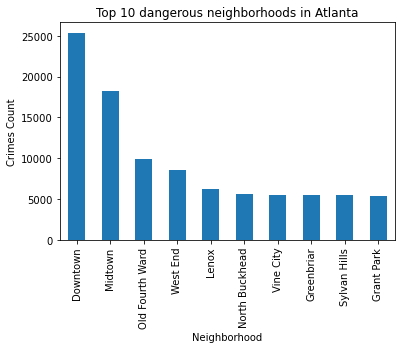

In [134]:
bar_plot = neighborhood_top10_df['Total Count'].plot.bar(width = 0.5, zorder = 3)
bar_plot.set_xlabel("Neighborhood")
bar_plot.set_ylabel("Crimes Count")
bar_plot.set_title("Top 10 dangerous neighborhoods in Atlanta")      

In [132]:
neighborhood_top10least_df = neighborhood_group_sorted_df.tail(10)
neighborhood_top10least_df

,Total Count
Neighborhood,
Fort McPherson,32
Bankhead Courts,30
Horseshoe Community,25
Regency Trace,20
Chattahoochee,14
Mt. Paran Parkway,12
Old Fairburn Village,11
Edmund Park,7
State Facility,5


Text(0.5, 1.0, 'Top 10 neighborhoods with the least crimes in Atlanta')

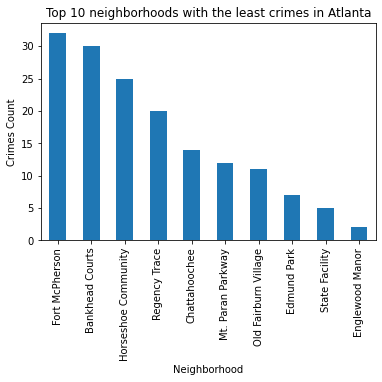

In [135]:
bar_plot = neighborhood_top10least_df['Total Count'].plot.bar(width = 0.5, zorder = 3)
bar_plot.set_xlabel("Neighborhood")
bar_plot.set_ylabel("Crimes Count")
bar_plot.set_title("Top 10 neighborhoods with the least crimes in Atlanta")   